In [1]:
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [2]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
IMG_SIZE = 180 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [25]:
for x,i in enumerate(raw_one):
    print(x)

0


In [4]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [5]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [6]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [7]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [8]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [9]:
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

In [10]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 14,979,909
Non-trainable params: 0
_________________________________________________________________


In [12]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [13]:
EPOCHS = 20   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/20
92/92 [==============================] - 93s 1s/step - loss: 0.7915 - accuracy: 0.7142 - val_loss: 0.5031 - val_accuracy: 0.8093
Epoch 2/20
92/92 [==============================] - 22s 242ms/step - loss: 0.4114 - accuracy: 0.8563 - val_loss: 0.4092 - val_accuracy: 0.8556
Epoch 3/20
92/92 [==============================] - 22s 239ms/step - loss: 0.3006 - accuracy: 0.8958 - val_loss: 0.4689 - val_accuracy: 0.8338
Epoch 4/20
92/92 [==============================] - 23s 253ms/step - loss: 0.2360 - accuracy: 0.9131 - val_loss: 0.3454 - val_accuracy: 0.8719
Epoch 5/20
92/92 [==============================] - 22s 240ms/step - loss: 0.1765 - accuracy: 0.9407 - val_loss: 0.3649 - val_accuracy: 0.8828
Epoch 6/20
92/92 [==============================] - 25s 268ms/step - loss: 0.1253 - accuracy: 0.9578 - val_loss: 0.4041 - val_accuracy: 0.8747
Epoch 7/20
92/92 [==============================] - 23s 247ms/step - loss: 0.1025 - accuracy: 0.9659 - val_loss: 0.3965 - val_accuracy: 0.8801
Ep

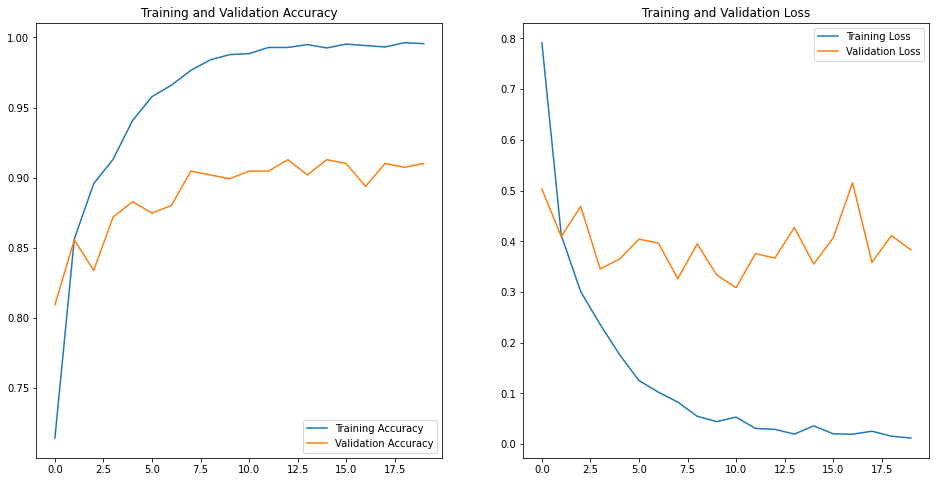

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
import os

checkpoint_dir = os.getenv("HOME") + "/tf_flowers/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

checkpoint 파일 생성 OK!!


In [16]:
test_steps = 10
loss0, accuracy0 = model.evaluate(test_batches, steps = test_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

10/10 [==============================] - 1s 67ms/step - loss: 0.3570 - accuracy: 0.9156
initial loss: 0.36
initial accuracy: 0.92
